../NR_project1/Shell_Slices/Shell_Slices/model_1_Shell_Avgs.dat
[1.07864441e-21 1.35482464e-18 2.90170158e+00 6.69234218e+00
 1.11828994e+01 1.58704450e+01 2.23417406e+01]


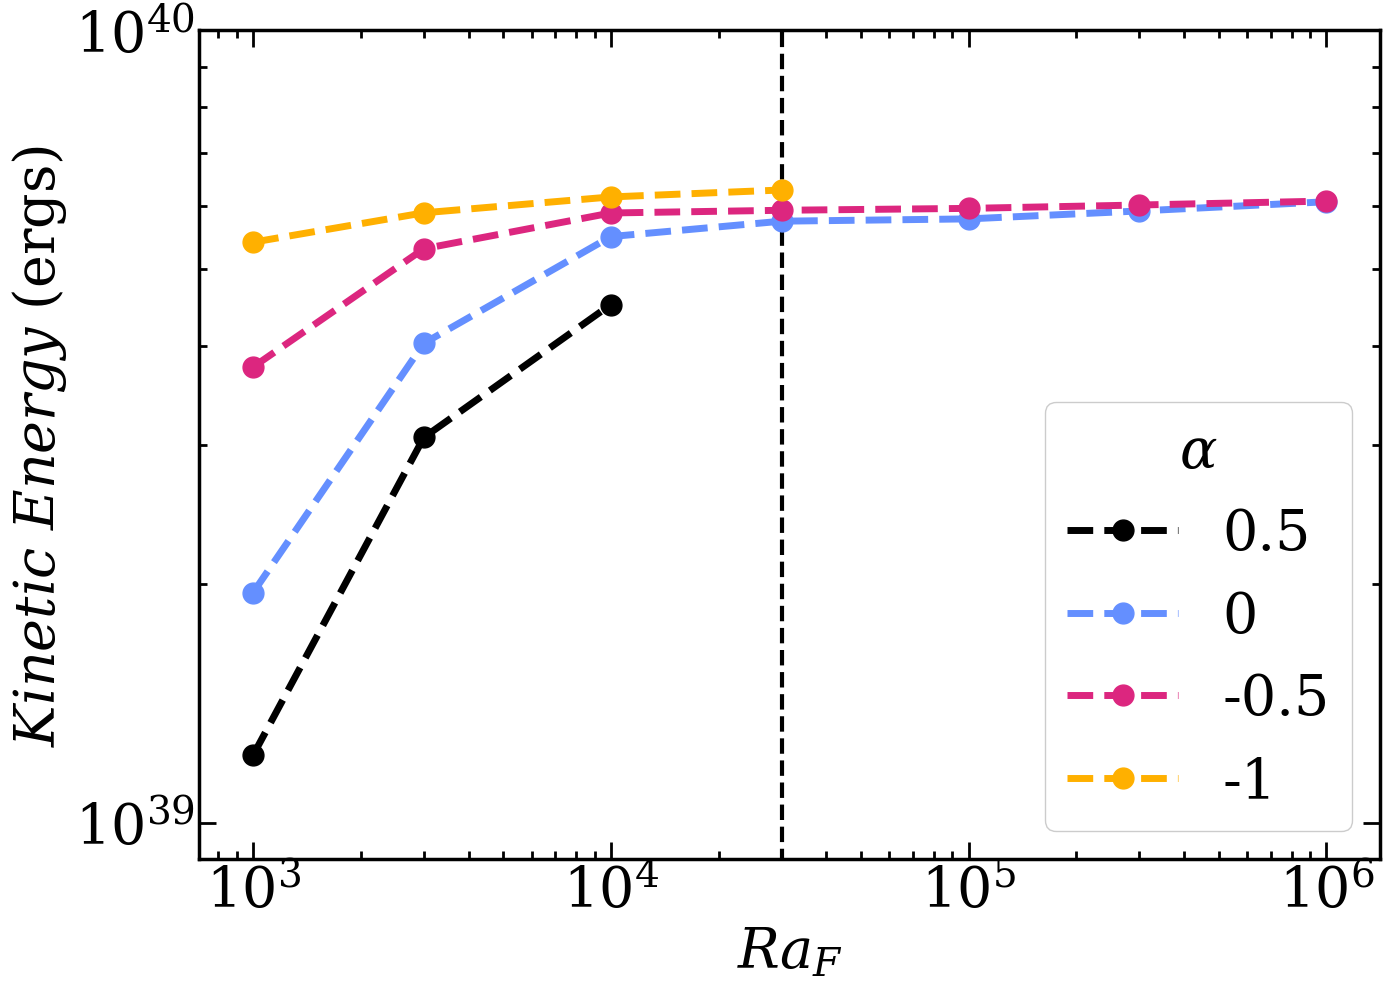

In [4]:
from rayleigh_diagnostics import G_Avgs, Shell_Slices
from New_Shell_Avgs import Shell_Avgs
from New_Shell_Spectra import Shell_Spectra
from reference_tools import equation_coefficients
import survey_utilities as su
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import *
import matplotlib as mpl
import spectral_utils



direc = '/home/bjlazard/Rayleigh_Data/NR_project1/'
file = 'model_' 
suffix = '_G_Avgs.dat'

mfile = '../NR_project1/Shell_Slices/Shell_Slices/model_1_Shell_Avgs.dat'
sa = Shell_Avgs(mfile,path='')

Raf_model1 = [1e3, 3e3, 1e4, 3e4, 1e5, 3e5, 1e6]  
Raf_model2 = [1e3, 3e3, 1e4, 3e4, 1e5, 3e5, 1e6]
Raf_model3 = [1e3, 3e3, 1e4, 3e4]# 1e5, 3e5, 1e6]
Raf_model4 = [1e3, 3e3, 1e4]
Raf_model5 = [1e3, 3e3, 1e4, 3e4, 1e5, 3e5, 1e6]  
Raf_model_ff = [1.314e3, 3.94e3, 1.314e4, 3.94e4, 1.314e5, 3.94e5, 1.314e6]
tot_ke_mod1 = []
tot_ke_mod2 = []
tot_ke_mod3 = []
tot_ke_mod4 = []
tot_ke_mod1f = []
tot_ke_mod1fx = []

#All internal heating BC
for i in range(1, 19):

    #Create file name and read in Global Averages
    infile = direc + file + str(i) + suffix
    ga = G_Avgs(infile, path = '')

    #Get the total Kinetic Energy
    ike = ga.lut[401]
    ke = ga.vals[:,ike]


    if i < 8:
        tot_ke_mod1.append(np.mean(ke[-1:-3286:-1]))
        #print('1')
    elif (i >= 8) and (i < 15):
        tot_ke_mod2.append(np.mean(ke[-1:-3286:-1]))
        #print('2')
    else:  
        tot_ke_mod3.append(np.mean(ke[-1:-3286:-1]))
        #print('3')

#other non internal heating BC
for i in range(1, 8):

    #Create file name and read in Global Averages
    infile = direc + file + str(i) + 'f' + suffix
    infile1 = direc + file + str(i) + 'fx' + suffix

    ga = G_Avgs(infile, path = '')
    ga1 = G_Avgs(infile1, path = '')

    #Get the total Kinetic Energy
    ike = ga.lut[401]
    ke = ga.vals[:,ike]

    ike1 = ga1.lut[401]
    ke1 = ga1.vals[:,ike1]

    tot_ke_mod1f.append(np.mean(ke[-1:-3286:-1]))
    tot_ke_mod1fx.append(np.mean(ke1[-1:-3286:-1]))



#alpha = 0.5
for i in range(24, 21, -1):
    #Models 0.5 case
    infile = direc + file + str(i) + suffix
    ga = G_Avgs(infile, path = '')
    ike = ga.lut[401]
    ke = ga.vals[:,ike]
    tot_ke_mod4.append(np.mean(ke[-1:-3286:-1]))


#Compute Volume
radius = sa.radius
vol = 4/3*np.pi*(radius[0]**3 - radius[-1]**2)


#Setup and plot the figure
fig, ax = plt.subplots(figsize = (14, 10))
plt.setp(ax.spines.values(), linewidth=2.5)
plt.rcParams["font.family"] = "serif"
plt.rcParams["mathtext.fontset"] = "dejavuserif"

#Convert to numpy arrays for performing operations
tot_ke_mod1f = np.array(tot_ke_mod1f)
tot_ke_mod1fx = np.array(tot_ke_mod1fx)
tot_ke_mod1 = np.array(tot_ke_mod1)
tot_ke_mod2 = np.array(tot_ke_mod2)
tot_ke_mod3 = np.array(tot_ke_mod3)
tot_ke_mod4 = np.array(tot_ke_mod4)

print(tot_ke_mod1fx * vol / 1e38)

#Plot the Kinetic Energy vs. Flux Rayleigh number
plt.plot(Raf_model4, tot_ke_mod4 * vol, 'o', markersize = 15, linestyle = 'dashed', linewidth = 5, color = 'black', label = r'0.5')
#plt.plot(Raf_model5[2:], tot_ke_mod1fx[2:] * vol, 'o', markersize = 15, linestyle = 'dashed', linewidth = 5, color = 'purple', label = r'$\alpha = 0$ (Fixed Entropy)')
#plt.plot(Raf_model4, tot_ke_mod4 * vol, 'o', markersize = 15, linestyle = 'dashed', linewidth = 5, color = 'black', label = r'$\alpha = 0.5$')
#plt.plot(Raf_model_ff, tot_ke_mod1f * vol, 'o', markersize = 15, linestyle = 'dashed', linewidth = 5,  color = 'green', label = r'$\alpha = 0$ (No Int. Heat)')
plt.plot(Raf_model1, tot_ke_mod1* vol, 'o', markersize = 15, linestyle = 'dashed', linewidth = 5, color = '#648FFF', label = r'0')
plt.plot(Raf_model2, tot_ke_mod2* vol, 'o', markersize = 15, linestyle = 'dashed', linewidth = 5, color = '#DC267F', label = r'-0.5')
plt.plot(Raf_model3, tot_ke_mod3* vol, 'o', markersize = 15, linestyle = 'dashed', linewidth = 5, color = '#FFB000', label = r'-1')


plt.xlabel(r'$Ra_F$', fontsize = 40)
plt.ylabel(r'$Kinetic~Energy~(\mathrm{ergs})$', fontsize = 40)
plt.yscale('log')
plt.xscale('log')
plt.ylim(9e38, 1e40)
plt.vlines(x = 3e4, ymin = 1e38, ymax = 1e40, linewidth = 3, linestyles = 'dashed', color = 'black')


ax.legend(title = r'$\alpha$', title_fontsize =40, fontsize = 40, loc = 'lower right', framealpha = 1)
ax.tick_params(which='minor', top = True, direction = 'in', length = 6, width = 2, right = True, labelsize = 40)
ax.tick_params(which='major', top = True, direction = 'in', length = 12, width = 2, right = True, labelsize = 40)
plt.tight_layout()

plt.savefig('ke_vs_raf.pdf', bbox_inches='tight', dpi = 300)

